# Malicious Websites Detection

## Artificial Intelligence, Fall 2021/2022

### Ahmad Arrabi 20170534

This work provides an analysis of a dataset downloaded from "https://www.kaggle.com/xwolf12/malicious-and-benign-websites". In addition to machine learning modelling to classify websites as malicious or benign

Import dependencies

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import plotly
import string as str
import seaborn as sns

Read the dataset and get some information about it

In [508]:
data = pd.read_csv("D:\\university\AI\Project\dataset.csv")

In [509]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [511]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


## Visualizing

This section visualizes some features in the dataset, the full description of the graphs can be found in the documentation

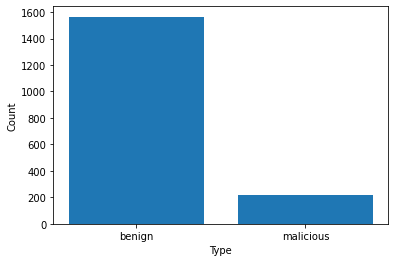

In [512]:
#VISUALIZE THE TARGET VARIABLE
plt.bar(['benign', 'malicious'], data.Type.value_counts())
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

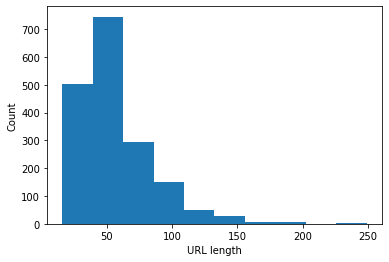

In [513]:
#VISUALIZE THE URL LENGTH
data.URL_LENGTH.hist(grid=False)
plt.xlabel('URL length')
plt.ylabel('Count')
plt.show()

In [514]:
#STATISTICS ABOUT THE URL LENGTH
data.URL_LENGTH.describe()

count    1781.000000
mean       56.961258
std        27.555586
min        16.000000
25%        39.000000
50%        49.000000
75%        68.000000
max       249.000000
Name: URL_LENGTH, dtype: float64

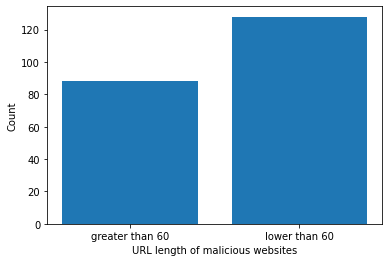

In [515]:
#VISUALIZE THE URL LENGTH OF MALICIOUS WEBSITES
plt.bar(['greater than 60', 'lower than 60'], [sum(data.loc[data['Type'] == 1]['URL_LENGTH'] > 60), 216-sum(data.loc[data['Type'] == 1]['URL_LENGTH'] > 60)])
plt.xlabel('URL length of malicious websites')
plt.ylabel('Count')
plt.show()

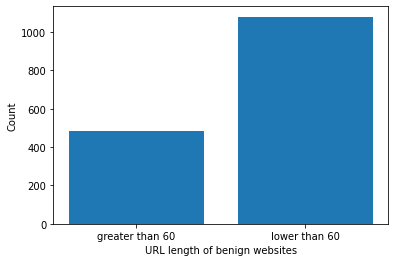

In [516]:
#VISUALIZE THE URL LENGTH OF BENIGN WEBSITES
plt.bar(['greater than 60', 'lower than 60'], [sum(data.loc[data['Type'] == 0]['URL_LENGTH'] > 60), 1563-sum(data.loc[data['Type'] == 0]['URL_LENGTH'] > 60)])
plt.xlabel('URL length of benign websites')
plt.ylabel('Count')
plt.show()

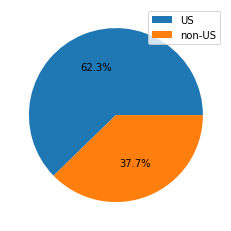

In [517]:
#VISUALIZE SERVER COUNTRIES
plt.pie([sum(data['WHOIS_COUNTRY'].str.contains('us', case=False)), 1779-sum(data['WHOIS_COUNTRY'].str.contains('us', case=False))], labels=None, autopct='%1.1f%%')
plt.legend(loc=0, labels=['US', 'non-US'])
plt.show()

## PreProcessing

This part deals with transforming the data and making it suitable for a ML model

### NULL Values

There exists some null values of the features 'DNS Quety Times' and 'Server' so they're dropped

In [518]:
data.loc[data['DNS_QUERY_TIMES'].isnull()]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1659,B0_772,101,15,UTF-8,Apache,7503.0,CA,ON,14/12/2009 0:00,13/12/2016 0:00,...,2,2,276,4,5,416,276,4,NaN,0


In [519]:
data.loc[data['SERVER'].isnull()]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,66,11,UTF-8,NaN,9405.0,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,...,2,4,1026,15,4,246,1026,15,0.0,0


The 'URL' column is unnecessary as it represents an ID for each row 

The 'content lenght' column includes a lot of NULL values so it's dropped

In [520]:
data.drop(columns=['URL','CONTENT_LENGTH'], inplace=True)

In [521]:
data.drop(index = [1659,1306], inplace=True)

In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   WHOIS_STATEPRO             1779 non-null   object 
 6   WHOIS_REGDATE              1779 non-null   object 
 7   WHOIS_UPDATED_DATE         1779 non-null   object 
 8   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 9   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 10  REMOTE_IPS                 1779 non-null   int64  
 11  APP_BYTES                  1779 non-null   int64  
 12  SOURCE_APP_PACKETS         1779 non-null   int64  
 13  REMOTE_APP_PACKETS         1779 non-null   int64

No null values exist

## Categorical

Here transformations are applied to transform categorical features into numerical ones

Below are the numerical features

In [523]:
numerics = ['int64','float64']
data.select_dtypes(include = numerics).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 4   REMOTE_IPS                 1779 non-null   int64  
 5   APP_BYTES                  1779 non-null   int64  
 6   SOURCE_APP_PACKETS         1779 non-null   int64  
 7   REMOTE_APP_PACKETS         1779 non-null   int64  
 8   SOURCE_APP_BYTES           1779 non-null   int64  
 9   REMOTE_APP_BYTES           1779 non-null   int64  
 10  APP_PACKETS                1779 non-null   int64  
 11  DNS_QUERY_TIMES            1779 non-null   float64
 12  Type                       1779 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 194.6 KB


Below are the categorical features

In [524]:
categorical = ['object']
data.select_dtypes(include = categorical)

,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
0,iso-8859-1,nginx,None,None,10/10/2015 18:21,None
1,UTF-8,Apache/2.4.10,None,None,None,None
2,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None
3,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45
4,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00
...,...,...,...,...,...,...
1776,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00
1777,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00
1778,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00
1779,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00


#### CHARSET

In [525]:
pd.value_counts(data['CHARSET'])

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [526]:
data[['utf_charset', 'iso_charset', 'ascii_charset', 'other_charset']] = 0

In [527]:
data.loc[data['CHARSET'].str.contains('utf', case=False),'utf_charset'] = 1
data.loc[data['CHARSET'].str.contains('iso', case=False),'iso_charset'] = 1
data.loc[data['CHARSET'].str.contains('ascii', case=False),'ascii_charset'] = 1
data.loc[data['CHARSET'].str.contains('windows', case=False),'other_charset'] = 1
data.loc[data['CHARSET'].str.contains('none', case=False),'other_charset'] = 1

In [528]:
data.drop(columns=['CHARSET'], inplace=True)

#### SERVER TYPE

In [529]:
pd.value_counts(data['SERVER']).unique

<bound method Series.unique of Apache                                                                             385
nginx                                                                              211
None                                                                               175
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
                                                                                  ... 
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips DAV/2 mod_bwlimited/1.4      1
gunicorn/19.7.1                                                                      1
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1                  1
Apache/2.2.16 (Debian)                                                               1
Name: SERVER

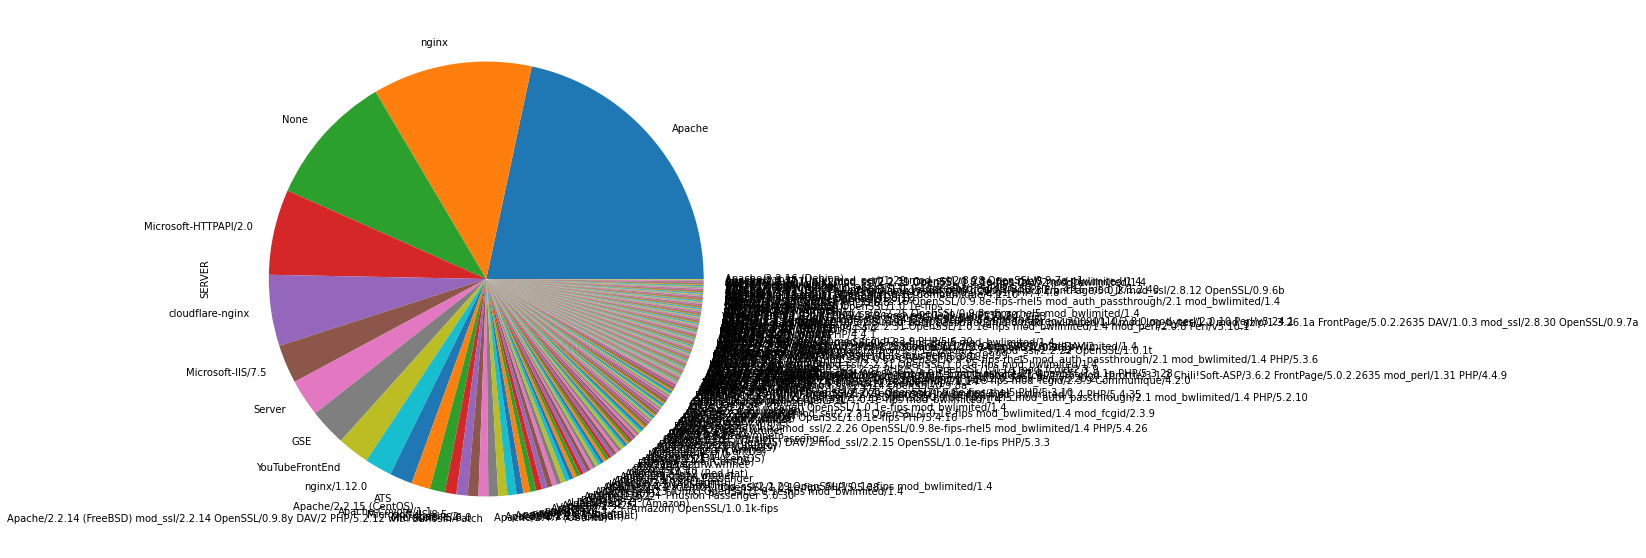

In [530]:
pd.value_counts(data['SERVER']).plot(kind = 'pie', figsize=(10,10))
plt.show()

In [531]:
data[['apache_server', 'nginx_server', 'microsoft_server', 'other_server']] = 0

In [532]:
data.loc[data['SERVER'].str.contains('apache', case=False),'apache_server'] = 1
data.loc[data['SERVER'].str.contains('nginx', case=False),'nginx_server'] = 1
data.loc[data['SERVER'].str.contains('microsoft', case=False),'microsoft_server'] = 1
data.loc[~data['SERVER'].str.contains('apache', case = False) &
    ~data['SERVER'].str.contains('nginx', case = False) &
    ~data['SERVER'].str.contains('microsoft', case = False), 'other_server'] = 1

In [533]:
data.drop(columns=['SERVER'], inplace=True)

#### SEREVR COUNTRY

In [534]:
pd.value_counts(data['WHOIS_COUNTRY']).unique

<bound method Series.unique of US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
CN                  10
IN                  10
UK                  10
FR                   9
CZ                   9
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
ru                   4
PH                   4
BS                   4
AT                   4
KY                   3
SE                   3
BE                   3
SC                   3
TR                   3
DE                   3
HK                   3
us                   3
IL                   2
SI                   2
UY                   2
Cyprus               2
RU                   2
UA                   2
KG                   2
BR                   2
NO                   2
LU                   1
LV                   1
United Kingdom       1
PK                   1
IT 

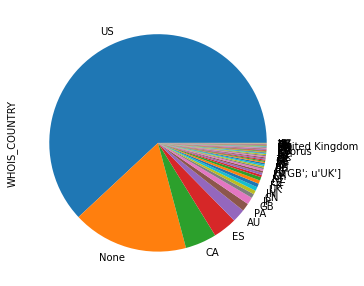

In [535]:
pd.value_counts(data['WHOIS_COUNTRY']).plot(kind = 'pie', figsize = (5,5))
plt.show()

In [536]:
data[['US_server', 'non_US_server']] = 0

In [537]:
data.loc[data['WHOIS_COUNTRY'].str.contains('us', case=False),'US_server'] = 1
data.loc[~data['WHOIS_COUNTRY'].str.contains('us', case = False), 'non_US_server'] = 1

In [538]:
data.drop(columns=['WHOIS_COUNTRY','WHOIS_STATEPRO'], inplace=True)

#### REGISTRATION AND UPDATE DATES

In [539]:
####################----UPDATE_DATE----#########################
data[['newly_updated', 'occasionally_updated', 'not_updated']] = 0

In [540]:
data.loc[data['WHOIS_UPDATED_DATE'].str.contains('2017', case=False), 'newly_updated'] = 1    
data.loc[data['WHOIS_UPDATED_DATE'].str.contains('2016', case=False), 'occasionally_updated'] = 1   
data.loc[~data['WHOIS_UPDATED_DATE'].str.contains('2017', case=False)&
         ~data['WHOIS_UPDATED_DATE'].str.contains('2016', case=False), 'not_updated'] = 1

In [541]:
data.drop(columns=['WHOIS_UPDATED_DATE'], inplace=True)

In [542]:
####################----REG_DATE----#########################
data[['new_website', 'ok_website', 'old_website']] = 0

In [543]:
data.loc[data['WHOIS_REGDATE'].str.contains('2017', case=False)|
         data['WHOIS_REGDATE'].str.contains('2016', case=False)|
         data['WHOIS_REGDATE'].str.contains('2015', case=False)|
         data['WHOIS_REGDATE'].str.contains('2014', case=False), 'new_website'] = 1

In [544]:
data.loc[data['WHOIS_REGDATE'].str.contains('2013', case=False)|
         data['WHOIS_REGDATE'].str.contains('2012', case=False)|
         data['WHOIS_REGDATE'].str.contains('2011', case=False)|
         data['WHOIS_REGDATE'].str.contains('2010', case=False)|
         data['WHOIS_REGDATE'].str.contains('2009', case=False)|
         data['WHOIS_REGDATE'].str.contains('2008', case=False)|
         data['WHOIS_REGDATE'].str.contains('2007', case=False)|
         data['WHOIS_REGDATE'].str.contains('2006', case=False)|
         data['WHOIS_REGDATE'].str.contains('2005', case=False)|
         data['WHOIS_REGDATE'].str.contains('2004', case=False), 'ok_website'] = 1

In [545]:
data.loc[~data['WHOIS_REGDATE'].str.contains('2017', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2016', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2015', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2014', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2013', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2012', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2011', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2010', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2009', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2008', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2007', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2006', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2005', case=False)&
         ~data['WHOIS_REGDATE'].str.contains('2004', case=False), 'old_website'] = 1

In [546]:
data.drop(columns=['WHOIS_REGDATE'], inplace=True)

In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 4   REMOTE_IPS                 1779 non-null   int64  
 5   APP_BYTES                  1779 non-null   int64  
 6   SOURCE_APP_PACKETS         1779 non-null   int64  
 7   REMOTE_APP_PACKETS         1779 non-null   int64  
 8   SOURCE_APP_BYTES           1779 non-null   int64  
 9   REMOTE_APP_BYTES           1779 non-null   int64  
 10  APP_PACKETS                1779 non-null   int64  
 11  DNS_QUERY_TIMES            1779 non-null   float64
 12  Type                       1779 non-null   int64  
 13  utf_charset                1779 non-null   int64

### Numerical values (Statistical Analysis)

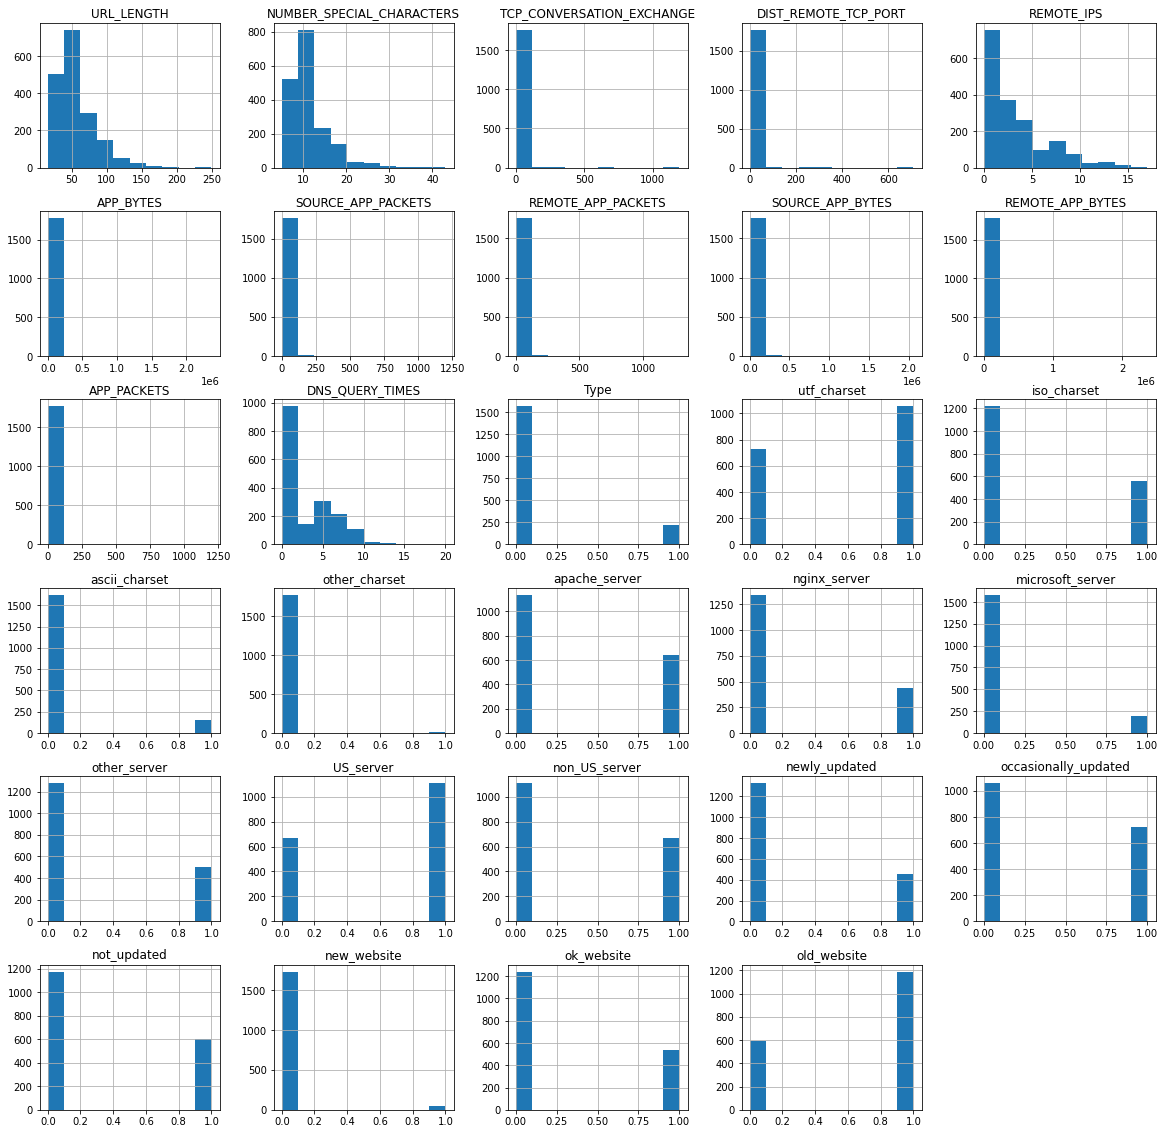

In [548]:
data.hist(figsize=(20,20))
plt.show()

In [549]:
data.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,microsoft_server,other_server,US_server,non_US_server,newly_updated,occasionally_updated,not_updated,new_website,ok_website,old_website
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1.779000e+03,1779.000000,1779.000000,1.779000e+03,1.779000e+03,...,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,56.931422,11.109612,16.268690,5.476672,3.060708,2.984960e+03,18.550309,18.762226,1.591004e+04,3.158414e+03,...,0.111298,0.282743,0.622260,0.377740,0.254637,0.405284,0.340079,0.028668,0.303541,0.667791
std,27.550441,4.551519,40.522693,21.819277,3.388713,5.608203e+04,41.649066,46.421592,6.989926e+04,5.608523e+04,...,0.314590,0.450459,0.484959,0.484959,0.435780,0.491085,0.473869,0.166918,0.459916,0.471138
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,10.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.930000e+02,7.350000e+02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,68.000000,13.000000,22.000000,5.000000,5.000000,2.328500e+03,26.000000,25.000000,9.808500e+03,2.708000e+03,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,249.000000,43.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


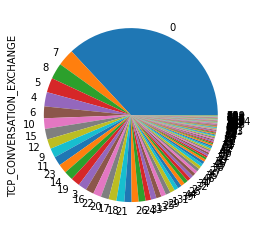

In [550]:
data['TCP_CONVERSATION_EXCHANGE'].value_counts().plot(kind='pie')
plt.show()

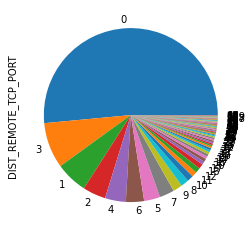

In [551]:
data['DIST_REMOTE_TCP_PORT'].value_counts().plot(kind='pie')
plt.show()

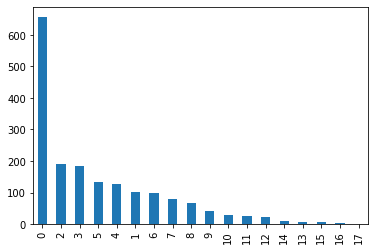

In [552]:
data['REMOTE_IPS'].value_counts().plot(kind='bar')
plt.show()

## Train Test Split (stratified Sampling)

In [554]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 4   REMOTE_IPS                 1779 non-null   int64  
 5   APP_BYTES                  1779 non-null   int64  
 6   SOURCE_APP_PACKETS         1779 non-null   int64  
 7   REMOTE_APP_PACKETS         1779 non-null   int64  
 8   SOURCE_APP_BYTES           1779 non-null   int64  
 9   REMOTE_APP_BYTES           1779 non-null   int64  
 10  APP_PACKETS                1779 non-null   int64  
 11  DNS_QUERY_TIMES            1779 non-null   float64
 12  Type                       1779 non-null   int64  
 13  utf_charset                1779 non-null   int64

In [555]:
from sklearn.model_selection import train_test_split

In [556]:
###########-------STRATIFY--------##########
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['Type'], inplace=False), data['Type'], test_size=0.2, stratify=data['Type'], random_state=42)

###### All are ~13% type 1, this concludes that our split represents the data 

In [557]:
data.Type.value_counts()

0    1563
1     216
Name: Type, dtype: int64

In [558]:
y_train.value_counts()

0    1250
1     173
Name: Type, dtype: int64

In [559]:
y_test.value_counts()

0    313
1     43
Name: Type, dtype: int64

## Correlation

In [560]:
corr_matrix = data.corr()

In [561]:
pd.DataFrame(corr_matrix['Type']).sort_values(by='Type', ascending=False)

,Type
Type,1.000000
non_US_server,0.299637
NUMBER_SPECIAL_CHARACTERS,0.281150
URL_LENGTH,0.162641
ok_website,0.158841
apache_server,0.157861
occasionally_updated,0.113786
utf_charset,0.084562
nginx_server,0.076272
DNS_QUERY_TIMES,0.068606


In [562]:
plotly.plot(pd.DataFrame(corr_matrix['Type']).sort_values(by='Type', ascending=False),kind='bar')

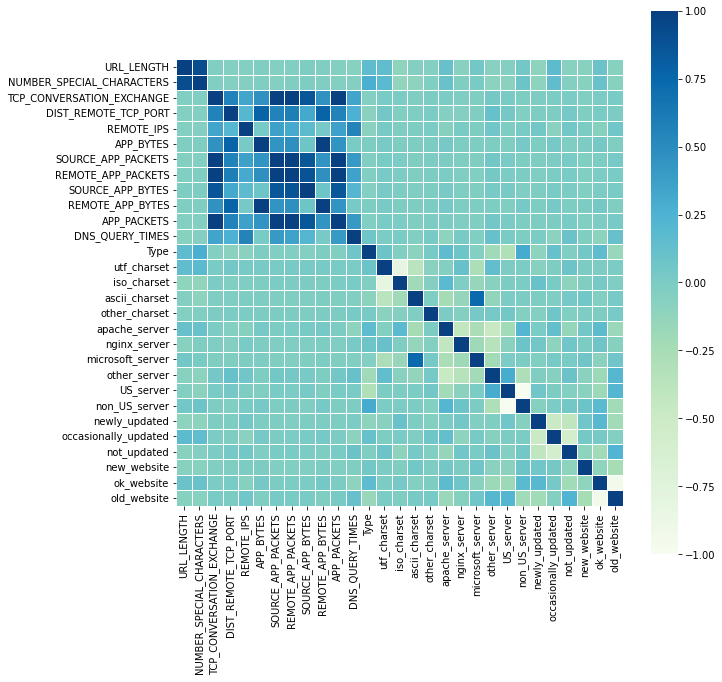

In [563]:
fig, ax = plt.subplots(figsize=(10,10))        
heat_map = sns.heatmap(corr_matrix, linewidths=0.5, ax=ax, cmap='GnBu', square=True)

## Feature Scaling 

### Normalizer

In [564]:
from sklearn import preprocessing 

In [565]:
normalizer_train = preprocessing.Normalizer().fit(x_train)
normalizer_test = preprocessing.Normalizer().fit(x_test)

x_train_normalized = normalizer_train.transform(x_train)
x_test_normalized = normalizer_test.transform(x_test)

In [566]:
x_train_normalized[0]

array([2.40402466e-03, 5.69374262e-04, 1.20201233e-03, 0.00000000e+00,
       1.89791421e-04, 1.17101307e-01, 1.45506756e-03, 1.45506756e-03,
       9.83815462e-01, 1.35574338e-01, 1.45506756e-03, 2.53055228e-04,
       6.32638069e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.32638069e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.32638069e-05, 0.00000000e+00, 0.00000000e+00, 6.32638069e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.32638069e-05])

In [567]:
x_test_normalized[0]

array([5.84517987e-04, 1.02547015e-04, 6.35791495e-04, 0.00000000e+00,
       3.07641046e-05, 4.84534647e-02, 6.76810301e-04, 6.66555599e-04,
       9.97495327e-01, 5.15093658e-02, 6.76810301e-04, 4.10188061e-05,
       0.00000000e+00, 0.00000000e+00, 1.02547015e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.02547015e-05, 0.00000000e+00,
       0.00000000e+00, 1.02547015e-05, 0.00000000e+00, 0.00000000e+00,
       1.02547015e-05, 0.00000000e+00, 0.00000000e+00, 1.02547015e-05])

### Min Max Scaler 

In [568]:
min_max_train = preprocessing.MinMaxScaler().fit(x_train)
min_max_test = preprocessing.MinMaxScaler().fit(x_test)

x_train_min_max = min_max_train.transform(x_train)
x_test_min_max = min_max_test.transform(x_test)

In [569]:
x_train_min_max[0]

array([9.44206009e-02, 1.05263158e-01, 2.67983075e-02, 0.00000000e+00,
       1.76470588e-01, 7.83357442e-04, 3.24400564e-02, 2.74790920e-02,
       1.46900458e-02, 9.06934089e-04, 3.24400564e-02, 2.85714286e-01,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00])

In [570]:
x_test_min_max[0]

array([0.24550898, 0.20833333, 0.0519263 , 0.        , 0.2       ,
       0.0473243 , 0.05509182, 0.05062305, 0.04721914, 0.05015427,
       0.05509182, 0.2       , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        ])

### Standard Scaler 

In [571]:
std_scaler_train = preprocessing.StandardScaler().fit(x_train)
std_scaler_test = preprocessing.StandardScaler().fit(x_test)

x_train_std_scaled = std_scaler_train.transform(x_train)
x_test_std_scaled = std_scaler_test.transform(x_test)

In [572]:
x_train_std_scaled[0]

array([-0.66922023, -0.44564578,  0.10559158, -0.23766395, -0.01725387,
       -0.02262101,  0.15401378,  0.12612918,  0.00735551, -0.02075841,
        0.15401378,  0.58417833,  0.81148516, -0.66463724, -0.30347185,
       -0.07978046,  1.31977694, -0.57112893, -0.34454418, -0.62856825,
        0.76461266, -0.76461266, -0.59818428,  1.22510356, -0.71233086,
       -0.1743925 , -0.66353855,  0.71009037])

In [573]:
x_test_std_scaled[0]

array([-0.09419842, -0.32307815,  0.65598545, -0.4831591 , -0.02055496,
        0.49892478,  0.67439933,  0.61444021,  0.68434275,  0.51482643,
        0.67439933,  0.6243174 , -1.10053629, -0.74015275,  3.02843665,
        0.        , -0.7265652 , -0.56437445,  2.56407256, -0.625     ,
       -1.19237943,  1.19237943, -0.52969382, -0.86319062,  1.35107247,
       -0.16104844, -0.6467818 ,  0.68634859])

## Modelling

## SVM

#### normalizer (normalize each row individually)

In [574]:
from sklearn import svm

SVM_classifier_normalized = svm.SVC(C=10, shrinking=False)
SVM_classifier_normalized.fit(x_train_normalized, y_train)

SVC(C=10, shrinking=False)

In [575]:
from sklearn.metrics import f1_score

train_predictions_normalized = SVM_classifier_normalized.predict(x_train_normalized)
train_score = f1_score(y_train, train_predictions_normalized, average='binary')

test_predictions_normalized = SVM_classifier_normalized.predict(x_test_normalized)
test_score = f1_score(y_test, test_predictions_normalized, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

Training f1 score:  0.4761904761904762 
Test f1 score    :  0.6666666666666667


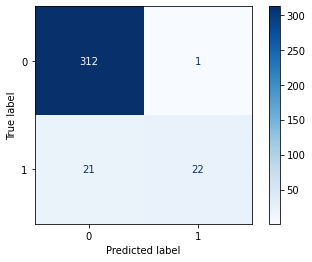

In [576]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_predictions_normalized, labels = SVM_classifier_normalized.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_classifier_normalized.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

In [577]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 384 to 866
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1423 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1423 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1423 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1423 non-null   int64  
 4   REMOTE_IPS                 1423 non-null   int64  
 5   APP_BYTES                  1423 non-null   int64  
 6   SOURCE_APP_PACKETS         1423 non-null   int64  
 7   REMOTE_APP_PACKETS         1423 non-null   int64  
 8   SOURCE_APP_BYTES           1423 non-null   int64  
 9   REMOTE_APP_BYTES           1423 non-null   int64  
 10  APP_PACKETS                1423 non-null   int64  
 11  DNS_QUERY_TIMES            1423 non-null   float64
 12  utf_charset                1423 non-null   int64  
 13  iso_charset                1423 non-null   int6

#### min max

In [578]:
SVM_classifier_min_max = svm.SVC(C=100)
SVM_classifier_min_max.fit(x_train_min_max, y_train)

train_predictions_min_max = SVM_classifier_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, train_predictions_min_max, average='binary')

test_predictions_min_max = SVM_classifier_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, test_predictions_min_max, average = 'binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

Training f1 score:  0.8928571428571429 
Test f1 score    :  0.8607594936708861


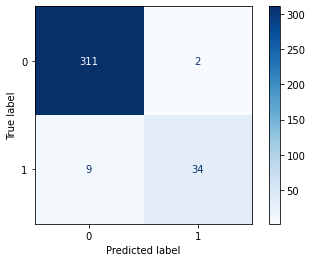

In [579]:
cm = confusion_matrix(y_test, test_predictions_min_max, labels = SVM_classifier_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_classifier_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

#### Standard scaler

In [580]:
SVM_classifier_std_scaler = svm.SVC(C=10, shrinking=False)
SVM_classifier_std_scaler.fit(x_train_std_scaled, y_train)

train_predictions_std_scaler = SVM_classifier_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, train_predictions_std_scaler, average='binary')

test_predictions_std_scaler = SVM_classifier_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, test_predictions_std_scaler, average = 'binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

Training f1 score:  0.8841463414634145 
Test f1 score    :  0.8333333333333333


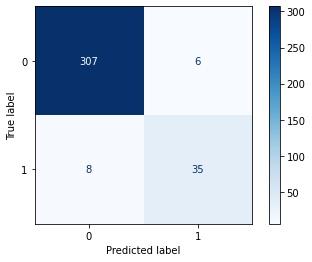

In [581]:
cm = confusion_matrix(y_test, test_predictions_std_scaler, labels = SVM_classifier_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_classifier_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## KNN Classifier

### min max

Training f1 score:  0.8766233766233766 
Test f1 score    :  0.7894736842105263


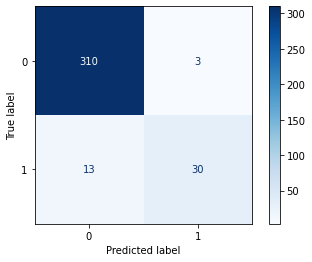

In [582]:
from sklearn.neighbors import KNeighborsClassifier

KNN_min_max = KNeighborsClassifier(n_neighbors=2)
KNN_min_max.fit(x_train_min_max, y_train)

KNN_train_predictions_min_max = KNN_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, KNN_train_predictions_min_max, average='binary')

KNN_test_predictions_min_max = KNN_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, KNN_test_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, KNN_test_predictions_min_max, labels = KNN_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = KNN_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

### Standard Scaler

Training f1 score:  0.891025641025641 
Test f1 score    :  0.8354430379746837


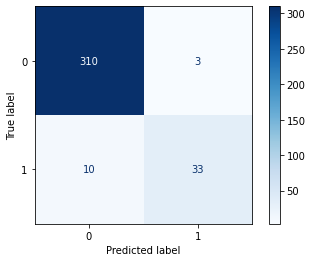

In [583]:
from sklearn.neighbors import KNeighborsClassifier

KNN_std_scaler = KNeighborsClassifier(n_neighbors=2)
KNN_std_scaler.fit(x_train_std_scaled, y_train)

KNN_train_predictions_std_scaler = KNN_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, KNN_train_predictions_std_scaler, average='binary')

KNN_test_predictions_std_scaler = KNN_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, KNN_test_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, KNN_test_predictions_std_scaler, labels = KNN_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = KNN_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## Sklearn NN

#### min max

Training f1 score:  0.8827160493827161 
Test f1 score    :  0.8717948717948717


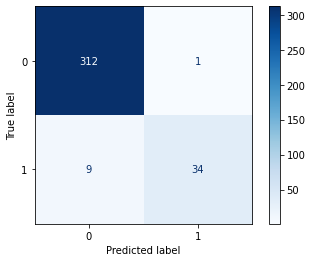

In [584]:
from sklearn.neural_network import MLPClassifier

MLP_min_max = MLPClassifier(activation='tanh',
                            solver='adam',
                            random_state=42,
                            #verbose=True,
                            epsilon=1e-12,
                            max_iter=1000,
                            hidden_layer_sizes=(64,32,16,8,))
MLP_min_max.fit(x_train_min_max, y_train)

MLP_train_predictions_min_max = MLP_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, MLP_train_predictions_min_max, average='binary')

MLP_test_predictions_min_max = MLP_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, MLP_test_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, MLP_test_predictions_min_max, labels = MLP_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = MLP_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

### Standard Scaler

Training f1 score:  0.9557522123893805 
Test f1 score    :  0.8735632183908046


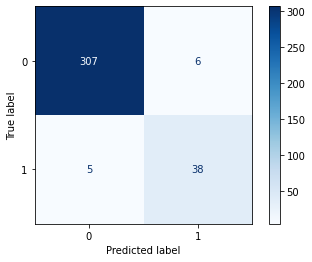

In [590]:
MLP_std_scaler = MLPClassifier(activation='relu',
                            solver='adam',
                            random_state=42,
                            #verbose=True,
                            max_iter=1000,
                            epsilon=1e-9,
                            alpha=1,
                            hidden_layer_sizes=(128,32,8,4))
MLP_std_scaler.fit(x_train_std_scaled, y_train)

MLP_train_predictions_std_scaler = MLP_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, MLP_train_predictions_std_scaler, average='binary')

MLP_test_predictions_std_scaler = MLP_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, MLP_test_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, MLP_test_predictions_std_scaler, labels = MLP_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = MLP_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## Ensemble Methods

## Hard Voting

### min-max

[Voting] ...................... (1 of 3) Processing svm, total=   0.0s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   4.0s
Training f1 score:  0.8916408668730651 
Test f1 score    :  0.8717948717948717


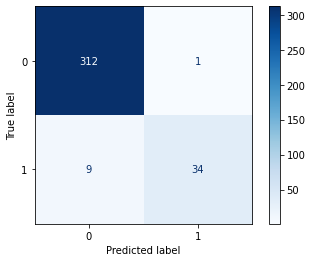

In [586]:
from sklearn.ensemble import VotingClassifier


ensemble_hard_min_max = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_min_max),
                                ('knn', KNN_min_max),
                                ('mlp', MLP_min_max)],
                                voting='hard', verbose=True)

ensemble_hard_min_max = ensemble_hard_min_max.fit(x_train_min_max, y_train)

ensemble_hard_train_predictions_min_max = ensemble_hard_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, ensemble_hard_train_predictions_min_max, average='binary')

ensemble_hard_predictions_min_max = ensemble_hard_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, ensemble_hard_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_hard_predictions_min_max, labels = ensemble_hard_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_hard_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

### Standard scaler

[Voting] ...................... (1 of 3) Processing svm, total=   0.0s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   3.0s
Training f1 score:  0.9357798165137615 
Test f1 score    :  0.8571428571428572


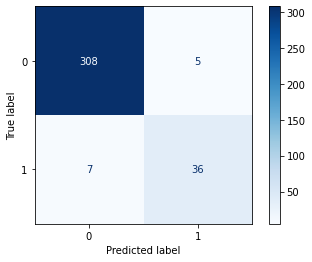

In [587]:
from sklearn.ensemble import VotingClassifier


ensemble_hard_std_scaler = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_std_scaler),
                                ('knn', KNN_std_scaler),
                                ('mlp', MLP_std_scaler)],
                                voting='hard', verbose=True)

ensemble_hard_std_scaler = ensemble_hard_std_scaler.fit(x_train_std_scaled, y_train)

ensemble_hard_train_predictions_std_scaler = ensemble_hard_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, ensemble_hard_train_predictions_std_scaler, average='binary')

ensemble_hard_predictions_std_scaler = ensemble_hard_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, ensemble_hard_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_hard_predictions_std_scaler, labels = ensemble_hard_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_hard_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## Soft Voting

[Voting] ...................... (1 of 3) Processing svm, total=   0.2s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   4.1s
Training f1 score:  0.8950617283950617 
Test f1 score    :  0.8571428571428571


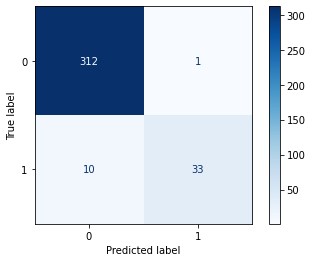

In [588]:
from sklearn.ensemble import VotingClassifier

SVM_classifier_min_max = svm.SVC(C=10, shrinking=False, probability=True)

ensemble_soft_min_max = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_min_max),
                                ('knn', KNN_min_max),
                                ('mlp', MLP_min_max)],
                                voting='soft', verbose=True)

ensemble_soft_min_max = ensemble_soft_min_max.fit(x_train_min_max, y_train)

ensemble_soft_train_predictions_min_max = ensemble_soft_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, ensemble_soft_train_predictions_min_max, average='binary')

ensemble_soft_predictions_min_max = ensemble_soft_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, ensemble_soft_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_soft_predictions_min_max, labels = ensemble_soft_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_soft_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

[Voting] ...................... (1 of 3) Processing svm, total=   0.2s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   2.9s
Training f1 score:  0.9794721407624633 
Test f1 score    :  0.8314606741573034


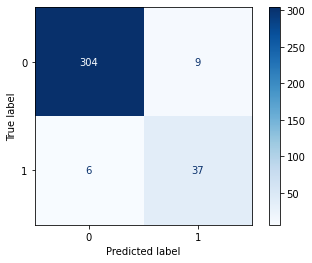

In [589]:
from sklearn.ensemble import VotingClassifier

SVM_classifier_std_scaler = svm.SVC(C=10, shrinking=False, probability=True)

ensemble_soft_std_scaler = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_std_scaler),
                                ('knn', KNN_std_scaler),
                                ('mlp', MLP_std_scaler)],
                                voting='soft', verbose=True)

ensemble_soft_std_scaler = ensemble_soft_std_scaler.fit(x_train_std_scaled, y_train)

ensemble_soft_train_predictions_std_scaler = ensemble_soft_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, ensemble_soft_train_predictions_std_scaler, average='binary')

ensemble_soft_predictions_std_scaler = ensemble_soft_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, ensemble_soft_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_soft_predictions_std_scaler, labels = ensemble_soft_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_soft_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

# Feature Selection

To reduce the complexity of the dataset, we'll only take the highly correlated features with the target.

The chosen features were only the ones with 0.1 or above linear correlation with the target. So all other features were dropped

In [604]:
data2 = data.drop(columns=['REMOTE_IPS',
                    'utf_charset',
                    'nginx_server',
                    'DNS_QUERY_TIMES',
                    'new_website',
                    'other_charset',
                    'REMOTE_APP_BYTES',
                    'APP_BYTES',
                    'not_updated',
                    'REMOTE_APP_PACKETS',
                    'SOURCE_APP_PACKETS',
                    'APP_PACKETS',
                    'iso_charset',            
                    'TCP_CONVERSATION_EXCHANGE' ,                
                    'SOURCE_APP_BYTES',
                    'microsoft_server',
                    'DIST_REMOTE_TCP_PORT',                         
                    'ascii_charset'], inplace=False)

# Train test split

In [605]:
x_train, x_test, y_train, y_test = train_test_split(data2.drop(columns=['Type'], inplace=False), data2['Type'], test_size=0.2, stratify=data2['Type'], random_state=42)

### Min Max Scaler 

In [607]:
min_max_train = preprocessing.MinMaxScaler().fit(x_train)
min_max_test = preprocessing.MinMaxScaler().fit(x_test)

x_train_min_max = min_max_train.transform(x_train)
x_test_min_max = min_max_test.transform(x_test)

### Standard Scaler 

In [608]:
std_scaler_train = preprocessing.StandardScaler().fit(x_train)
std_scaler_test = preprocessing.StandardScaler().fit(x_test)

x_train_std_scaled = std_scaler_train.transform(x_train)
x_test_std_scaled = std_scaler_test.transform(x_test)

# Modeling

## SVM

#### min max

In [649]:
SVM_classifier_min_max = svm.SVC(C=150)
SVM_classifier_min_max.fit(x_train_min_max, y_train)

train_predictions_min_max = SVM_classifier_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, train_predictions_min_max, average='binary')

test_predictions_min_max = SVM_classifier_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, test_predictions_min_max, average = 'binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

Training f1 score:  0.7147766323024055 
Test f1 score    :  0.7551020408163266


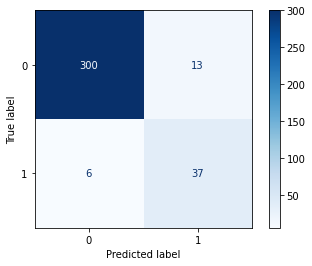

In [633]:
cm = confusion_matrix(y_test, test_predictions_min_max, labels = SVM_classifier_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_classifier_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

#### Standard scaler

In [650]:
SVM_classifier_std_scaler = svm.SVC(C=100, shrinking=False)
SVM_classifier_std_scaler.fit(x_train_std_scaled, y_train)

train_predictions_std_scaler = SVM_classifier_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, train_predictions_std_scaler, average='binary')

test_predictions_std_scaler = SVM_classifier_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, test_predictions_std_scaler, average = 'binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

Training f1 score:  0.8553054662379421 
Test f1 score    :  0.8505747126436781


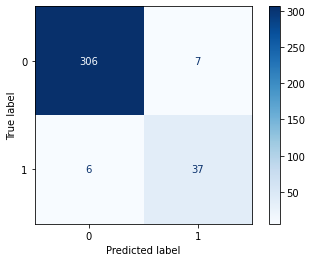

In [651]:
cm = confusion_matrix(y_test, test_predictions_std_scaler, labels = SVM_classifier_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_classifier_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## KNN Classifier

### min max

Training f1 score:  0.8082191780821918 
Test f1 score    :  0.7435897435897435


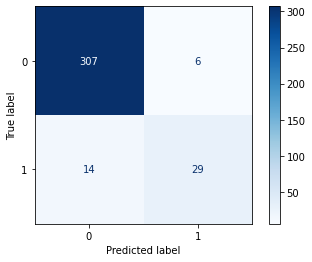

In [656]:
from sklearn.neighbors import KNeighborsClassifier

KNN_min_max = KNeighborsClassifier(n_neighbors=2)
KNN_min_max.fit(x_train_min_max, y_train)

KNN_train_predictions_min_max = KNN_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, KNN_train_predictions_min_max, average='binary')

KNN_test_predictions_min_max = KNN_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, KNN_test_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, KNN_test_predictions_min_max, labels = KNN_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = KNN_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

### Standard Scaler

Training f1 score:  0.8082191780821918 
Test f1 score    :  0.8048780487804877


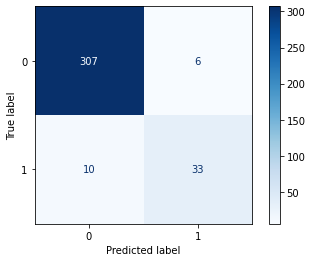

In [658]:
from sklearn.neighbors import KNeighborsClassifier

KNN_std_scaler = KNeighborsClassifier(n_neighbors=2)
KNN_std_scaler.fit(x_train_std_scaled, y_train)

KNN_train_predictions_std_scaler = KNN_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, KNN_train_predictions_std_scaler, average='binary')

KNN_test_predictions_std_scaler = KNN_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, KNN_test_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, KNN_test_predictions_std_scaler, labels = KNN_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = KNN_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## Sklearn NN

#### min max

Training f1 score:  0.8064516129032259 
Test f1 score    :  0.7333333333333334


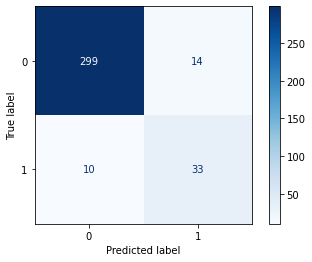

In [667]:
from sklearn.neural_network import MLPClassifier

MLP_min_max = MLPClassifier(activation='relu',
                            solver='adam',
                            random_state=42,
                            #verbose=True,
                            max_iter=1000,
                            hidden_layer_sizes=(64,32,16,8,))
MLP_min_max.fit(x_train_min_max, y_train)

MLP_train_predictions_min_max = MLP_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, MLP_train_predictions_min_max, average='binary')

MLP_test_predictions_min_max = MLP_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, MLP_test_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, MLP_test_predictions_min_max, labels = MLP_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = MLP_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

### Standard Scaler

Training f1 score:  0.8535031847133758 
Test f1 score    :  0.8505747126436781


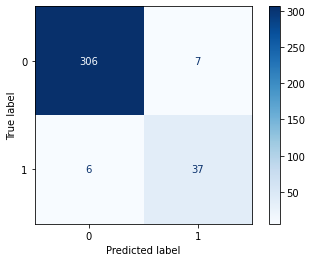

In [672]:
MLP_std_scaler = MLPClassifier(activation='tanh',
                            solver='adam',
                            random_state=42,
                            #verbose=True,
                            max_iter=1000,
                            epsilon=1e-9,
                            alpha=0.01,
                            hidden_layer_sizes=(128,32,8,4))
MLP_std_scaler.fit(x_train_std_scaled, y_train)

MLP_train_predictions_std_scaler = MLP_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, MLP_train_predictions_std_scaler, average='binary')

MLP_test_predictions_std_scaler = MLP_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, MLP_test_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, MLP_test_predictions_std_scaler, labels = MLP_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = MLP_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

# Ensemble Methods

## Hard Voting

### min-max

[Voting] ...................... (1 of 3) Processing svm, total=   0.0s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   3.2s
Training f1 score:  0.7946127946127945 
Test f1 score    :  0.7586206896551724


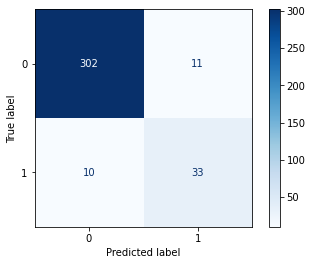

In [673]:
from sklearn.ensemble import VotingClassifier


ensemble_hard_min_max = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_min_max),
                                ('knn', KNN_min_max),
                                ('mlp', MLP_min_max)],
                                voting='hard', verbose=True)

ensemble_hard_min_max = ensemble_hard_min_max.fit(x_train_min_max, y_train)

ensemble_hard_train_predictions_min_max = ensemble_hard_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, ensemble_hard_train_predictions_min_max, average='binary')

ensemble_hard_predictions_min_max = ensemble_hard_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, ensemble_hard_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_hard_predictions_min_max, labels = ensemble_hard_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_hard_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

### Standard scaler

[Voting] ...................... (1 of 3) Processing svm, total=   0.0s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   3.5s
Training f1 score:  0.8478964401294498 
Test f1 score    :  0.8470588235294119


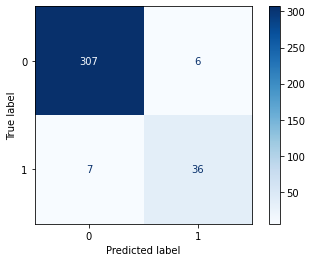

In [674]:
from sklearn.ensemble import VotingClassifier


ensemble_hard_std_scaler = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_std_scaler),
                                ('knn', KNN_std_scaler),
                                ('mlp', MLP_std_scaler)],
                                voting='hard', verbose=True)

ensemble_hard_std_scaler = ensemble_hard_std_scaler.fit(x_train_std_scaled, y_train)

ensemble_hard_train_predictions_std_scaler = ensemble_hard_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, ensemble_hard_train_predictions_std_scaler, average='binary')

ensemble_hard_predictions_std_scaler = ensemble_hard_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, ensemble_hard_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_hard_predictions_std_scaler, labels = ensemble_hard_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_hard_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

## Soft Voting

[Voting] ...................... (1 of 3) Processing svm, total=   0.1s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   3.3s
Training f1 score:  0.8066666666666668 
Test f1 score    :  0.8


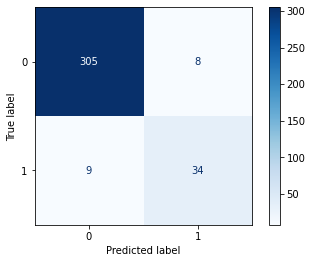

In [675]:
from sklearn.ensemble import VotingClassifier

SVM_classifier_min_max = svm.SVC(C=10, shrinking=False, probability=True)

ensemble_soft_min_max = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_min_max),
                                ('knn', KNN_min_max),
                                ('mlp', MLP_min_max)],
                                voting='soft', verbose=True)

ensemble_soft_min_max = ensemble_soft_min_max.fit(x_train_min_max, y_train)

ensemble_soft_train_predictions_min_max = ensemble_soft_min_max.predict(x_train_min_max)
train_score = f1_score(y_train, ensemble_soft_train_predictions_min_max, average='binary')

ensemble_soft_predictions_min_max = ensemble_soft_min_max.predict(x_test_min_max)
test_score = f1_score(y_test, ensemble_soft_predictions_min_max, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_soft_predictions_min_max, labels = ensemble_soft_min_max.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_soft_min_max.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()

[Voting] ...................... (1 of 3) Processing svm, total=   0.1s
[Voting] ...................... (2 of 3) Processing knn, total=   0.0s
[Voting] ...................... (3 of 3) Processing mlp, total=   3.6s
Training f1 score:  0.8571428571428571 
Test f1 score    :  0.8571428571428572


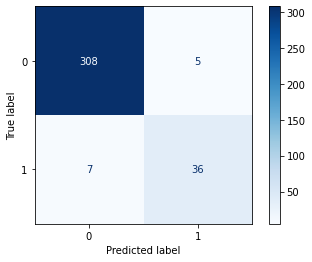

In [676]:
from sklearn.ensemble import VotingClassifier

SVM_classifier_std_scaler = svm.SVC(C=10, shrinking=False, probability=True)

ensemble_soft_std_scaler = VotingClassifier(estimators=[
                                ('svm', SVM_classifier_std_scaler),
                                ('knn', KNN_std_scaler),
                                ('mlp', MLP_std_scaler)],
                                voting='soft', verbose=True)

ensemble_soft_std_scaler = ensemble_soft_std_scaler.fit(x_train_std_scaled, y_train)

ensemble_soft_train_predictions_std_scaler = ensemble_soft_std_scaler.predict(x_train_std_scaled)
train_score = f1_score(y_train, ensemble_soft_train_predictions_std_scaler, average='binary')

ensemble_soft_predictions_std_scaler = ensemble_soft_std_scaler.predict(x_test_std_scaled)
test_score = f1_score(y_test, ensemble_soft_predictions_std_scaler, average='binary')

print("Training f1 score: " , train_score, "\nTest f1 score    : " , test_score)

cm = confusion_matrix(y_test, ensemble_soft_predictions_std_scaler, labels = ensemble_soft_std_scaler.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ensemble_soft_std_scaler.classes_)
disp.plot(cmap = 'Blues', include_values=True, colorbar=True, values_format='1.0f')
plt.show()